<h1>Tugas Pertemuan 5</h1>
<h1>Mencoba ANN</h1>

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

<h1> Load Data </h1> 

In [17]:
imagePaths = 'Dataset\\'
label_list = ['jeruknipis', 'Seledri']
data = []
labels = []

In [18]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [19]:
np.array(data).shape

(100, 32, 32, 3)

<h1>Proses Data</h1>

In [20]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [21]:
print(labels)

['jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Sele

In [22]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<h1> Split Data </h1>

In [23]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [24]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


<h1>Build ANN</h1>

In [25]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4,197,377
Trainable params: 4,197,377
Non-trainable params: 0
_________________________________________________________________


In [27]:
lr = 0.01
max_epochs = 100
opt_funct = SGD(learning_rate=lr)

In [28]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

<h1> Train Model </h1>

In [29]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 110ms/step - loss: 1.6489 - accuracy: 0.4500 - val_loss: 1.0762 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 1.2488 - accuracy: 0.4250 - val_loss: 0.7847 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 34ms/step - loss: 0.8788 - accuracy: 0.4750 - val_loss: 0.7040 - val_accuracy: 0.4000
Epoch 4/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6476 - accuracy: 0.5500 - val_loss: 0.6383 - val_accuracy: 0.6000
Epoch 5/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6602 - accuracy: 0.5250 - val_loss: 0.6274 - val_accuracy: 0.6000
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6435 - accuracy: 0.5500 - val_loss: 0.6196 - val_accuracy: 0.6000
Epoch 7/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6654 - accuracy: 0.4875 - val_loss: 1.0388 - val_accuracy: 0.4000
Epoch 8/100
3/3 [==

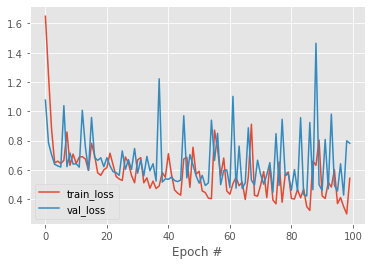

In [30]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

<h1>Evaluasi</h1>

In [31]:
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

  jeruknipis       0.00      0.00      0.00         8
     Seledri       0.60      1.00      0.75        12

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.37        20
weighted avg       0.36      0.60      0.45        20



C:\Users\ASUS\AppData\Local\Temp/ipykernel_7372/2175272745.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = (predictions > 0.5).astype(np.int)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\l

In [32]:
# uji model menggunakan image lain
queryPath = imagePaths+'tes.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.4009144]]


In [33]:
if q_pred<=0.5 :
    target = "Jeruk Nipis"
else :
    target = "Seledri"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
cv2.imshow('Output', output)
cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
cv2.destroyWindow('Output') # image akan diclose